In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()


business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [3]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.shape

(52268, 15)

/tmp/ipykernel_3609/1453912872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='stars', data=df_restaurants, palette="rocket", ax=ax)


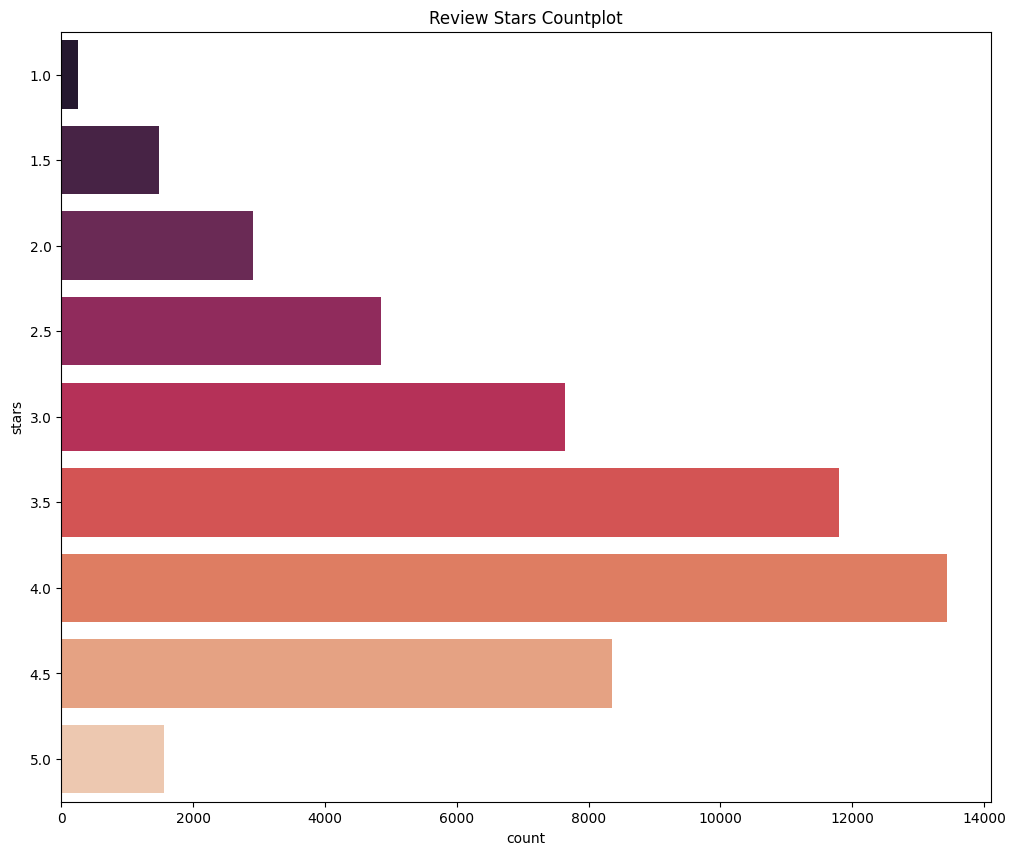

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(y='stars', data=df_restaurants, palette="rocket", ax=ax)
plt.title('Review Stars Countplot')
plt.savefig('stars.png')
plt.show()


In [5]:
top_restaurants = df_restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

business_id                                name  \
113731  _ab50qdWOk0DdB6XOrBitw                   Acme Oyster House   
112552  ac1AeYqs8Z4_e2X5M3if2A                        Oceana Grill   
91757   GXFMD0Z4jEVZBCsbPf4CTQ  Hattie B’s Hot Chicken - Nashville   
143157  ytynqOUb3hjKeJfRj5Tshw             Reading Terminal Market   
147081  oBNrLz4EDhiscSlbOl8uAw          Ruby Slipper - New Orleans   

                 address          city state postal_code   latitude  \
113731  724 Iberville St   New Orleans    LA       70130  29.954273   
112552      739 Conti St   New Orleans    LA       70130  29.956231   
91757     112 19th Ave S     Nashville    TN       37203  36.151387   
143157      51 N 12th St  Philadelphia    PA       19107  39.953341   
147081   200 Magazine St   New Orleans    LA       70130  29.951025   

        longitude  stars  review_count  is_open  \
113731 -90.068965    4.0          7568        1   
112552 -90.067563    4.0          7400        1   
91757  -86.796603    4.5          6093        1   
143157 -75.158855    4.5          5721        1   
147081 -90.067394    4.5          5193        1   

                                               attributes  \
113731  {'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...   
112552  {'RestaurantsGoodForGroups': 'True', 'Restaura...   
91757   {'RestaurantsGoodForGroups': 'True', 'Business...   
143157  {'RestaurantsGoodForGroups': 'True', 'Restaura...   
147081  {'NoiseLevel': ''loud'', 'Caters': 'False', 'B...   

                                               categories  \
113731  Live/Raw Food, Seafood, Restaurants, Cajun/Creole   
112552  Restaurants, Seafood, Cajun/Creole, Breakfast ...   
91757   American (Traditional), Chicken Shop, Southern...   
143157  Candy Stores, Shopping, Department Stores, Fas...   
147081  Restaurants, American (Traditional), American ...   

                                                    hours Restaurants  
113731  {'Monday': '11:0-22:0', 'Thursday': '11:0-22:0...        True  
112552  {'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W...        True  
91757   {'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...        True  
143157  {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...        True  
147081  {'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ...        True

/tmp/ipykernel_3609/346049835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stars', y='name', data=top_restaurants, ax=ax, palette="rocket")


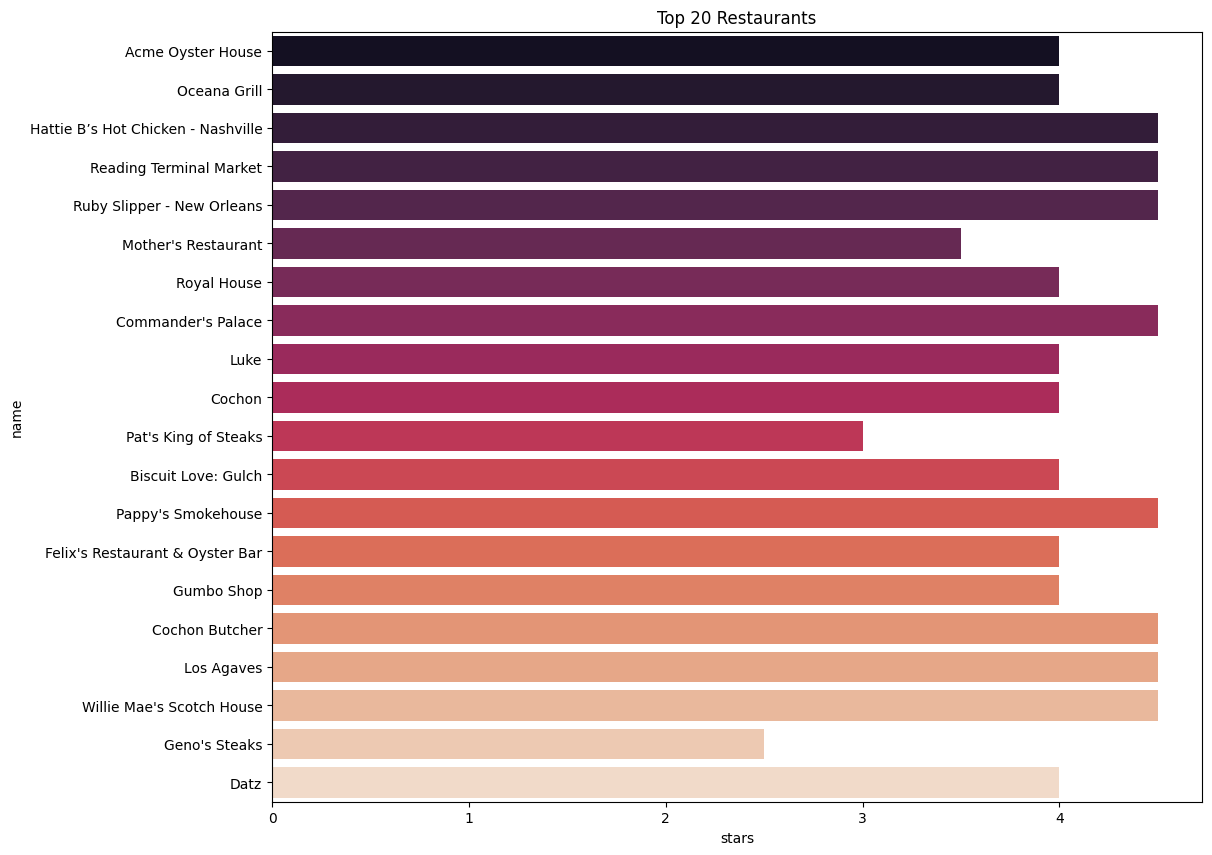

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='stars', y='name', data=top_restaurants, ax=ax, palette="rocket")
plt.title('Top 20 Restaurants')
plt.savefig('top20_restaurants.png')
plt.show()


In [144]:
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(df_restaurants, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=30, zoom=3, width=1200, height=800)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

florida = df_restaurants[df_restaurants['state'] == 'FL']
coords = florida[['longitude','latitude','stars']]
distortions = []
K = range(1,10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_km

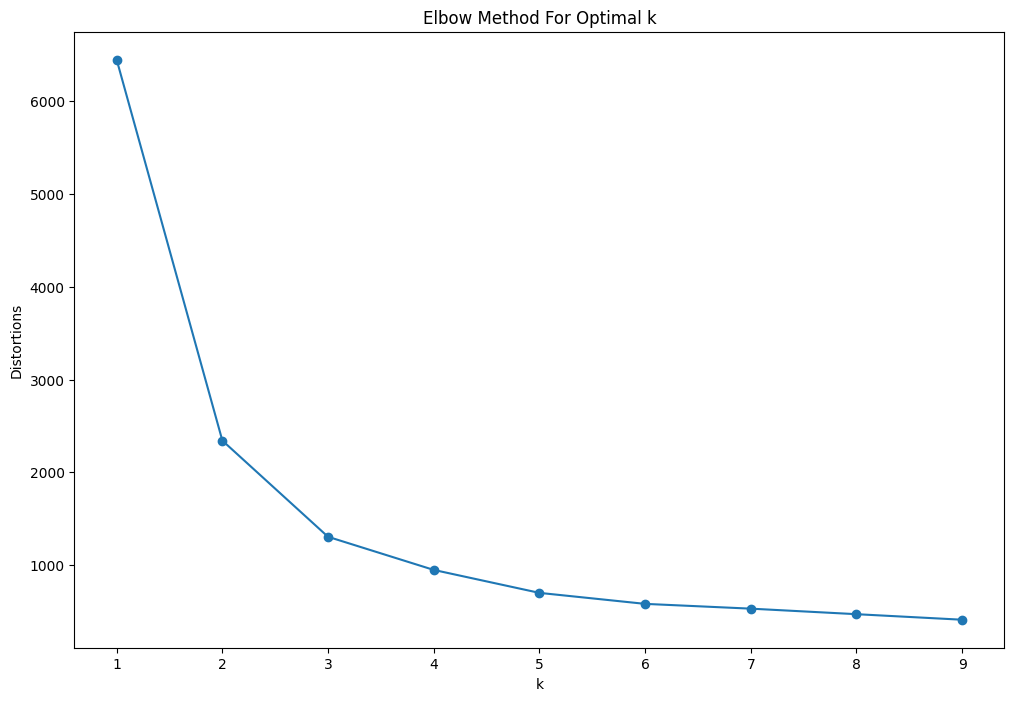

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_km

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k = 5  silhouette_score  0.4685143760412303


In [25]:
florida['cluster'] = kmeans.predict(florida[['longitude','latitude','stars']])
florida.head()

/tmp/ipykernel_3609/1115117502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



business_id                     name                  address  \
11  eEOYSgkmpB90uNA7lDOMRA    Vietnamese Food Truck                            
14  0bPLkL0QhhPO5kt1_EXmNQ     Zio's Italian Market            2575 E Bay Dr   
58  uI9XODGY_2_ieTE6xJ0myw              Roman Forum   10440 N Dale Mabry Hwy   
59  JgpnXv_0XhV3SfbfB50nxw              Joe's Pizza    2038 N Dale Mabry Hwy   
79  pJfh3Ct8iL58NZa8ta-a5w  Top Shelf Sports Lounge  3173 Cypress Ridge Blvd   

             city state postal_code   latitude  longitude  stars  \
11      Tampa Bay    FL       33602  27.955269 -82.456320    4.0   
14          Largo    FL       33771  27.916116 -82.760461    4.5   
58          Tampa    FL       33618  28.046203 -82.505053    4.0   
59          Tampa    FL       33607  27.960514 -82.506127    4.0   
79  Wesley Chapel    FL       33544  28.196252 -82.380615    4.5   

    review_count  is_open                                         attributes  \
11            10        1  {'Alcohol': ''none'', 'OutdoorSeating': 'None'...   
14           100        0  {'OutdoorSeating': 'False', 'RestaurantsGoodFo...   
58            23        0  {'BusinessParking': '{'garage': False, 'street...   
59            35        0  {'BusinessParking': '{'garage': False, 'street...   
79            95        1  {'BestNights': '{'monday': False, 'tuesday': F...   

                                           categories  \
11         Vietnamese, Food, Restaurants, Food Trucks   
14        Food, Delis, Italian, Bakeries, Restaurants   
58               Restaurants, American (New), Italian   
59                                 Restaurants, Pizza   
79  Burgers, Sports Bars, Bars, Lounges, Restauran...   

                                                hours Restaurants  cluster  
11  {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...        True        3  
14  {'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...        True        2  
58  {'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...        True        3  
59  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...        True        3  
79  {'Monday': '11:30-22:0', 'Tuesday': '11:30-23:...        True        2

In [143]:
px.scatter_mapbox(florida, lat="latitude", lon="longitude", color="cluster", size='review_count', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1200, height=800)

In [27]:
top_restaurants_florida = florida.sort_values(by=['review_count', 'stars'], ascending=False)
top_restaurants_florida.head()

business_id                      name              address  \
137449  QHWYlmVbLC3K6eglWoHVvA                      Datz   2616 S MacDill Ave   
117197  L5LLN0RafiV1Z9cddzvuCw                     Ulele  1810 N Highland Ave   
120856  dsfRniRgfbDjC8os848B6A        Bern's Steak House    1208 S Howard Ave   
99670   3YqUe2FTCQr0pPVK8oCv6Q       Columbia Restaurant       2117 E 7th Ave   
49717   DXDoh8MNrqjtXsZnkuk4hA  Frenchy's Rockaway Grill        7 Rockaway St   

                    city state postal_code   latitude  longitude  stars  \
137449             Tampa    FL       33629  27.921942 -82.493253    4.0   
117197             Tampa    FL       33602  27.960161 -82.462530    4.0   
120856             Tampa    FL       33606  27.931862 -82.482700    4.5   
99670              Tampa    FL       33605  27.960006 -82.434904    4.0   
49717   Clearwater Beach    FL       33767  27.983467 -82.827835    4.0   

        review_count  is_open  \
137449          3260        1   
117197          3064        1   
120856          2924        1   
99670           2860        1   
49717           2301        1   

                                               attributes  \
137449  {'RestaurantsAttire': 'u'casual'', 'BusinessAc...   
117197  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   
120856  {'OutdoorSeating': 'False', 'RestaurantsDelive...   
99670   {'Ambience': '{'romantic': False, 'intimate': ...   
49717   {'BikeParking': 'True', 'OutdoorSeating': 'Tru...   

                                               categories  \
137449  Burgers, Bars, Restaurants, American (Traditio...   
117197  Breweries, Food, American (New), Beer, Wine & ...   
120856     Arts & Entertainment, Steakhouses, Restaurants   
99670   Latin American, Restaurants, Spanish, American...   
49717   Sandwiches, American (Traditional), Restaurant...   

                                                    hours Restaurants  cluster  
137449  {'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '...        True        3  
117197  {'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...        True        3  
120856  {'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...        True        2  
99670   {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...        True        3  
49717   {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...        True        3

In [141]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude, 4.5], dtype="object").reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    partial = df[df['cluster']==cluster][['name', 'latitude','longitude', 'stars', 'review_count','cluster','categories']]
    preferences =  partial[partial['categories'].str.contains('Steakhouses')].head(10)
    new = partial[partial['categories'].str.contains('Sandwiches')].head(10)

    return preferences, new

In [62]:
recommend_restaurants(top_restaurants_florida,-115.1891691,  36.1017316)

2


/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



name   latitude  longitude  stars  review_count  \
120856        Bern's Steak House  27.931862 -82.482700    4.5          2924   
121653           Oxford Exchange  27.945114 -82.464621    4.5          1868   
106719            Clear Sky Cafe  27.981960 -82.827297    4.5          1824   
18273                     Bodega  27.770829 -82.650834    4.5          1772   
7801    Mazzaro's Italian Market  27.792256 -82.673539    4.5          1551   

        cluster  
120856        2  
121653        2  
106719        2  
18273         2  
7801          2

In [63]:
recommend_restaurants(top_restaurants_florida,-115.2798544, 36.0842838) 

2


/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



name   latitude  longitude  stars  review_count  \
120856        Bern's Steak House  27.931862 -82.482700    4.5          2924   
121653           Oxford Exchange  27.945114 -82.464621    4.5          1868   
106719            Clear Sky Cafe  27.981960 -82.827297    4.5          1824   
18273                     Bodega  27.770829 -82.650834    4.5          1772   
7801    Mazzaro's Italian Market  27.792256 -82.673539    4.5          1551   

        cluster  
120856        2  
121653        2  
106719        2  
18273         2  
7801          2

In [138]:
test_coordinates = {
    'user': [1, 2, 3], 
    'latitude': [27.931882, 27.941882, 27.155011],
    'longitude': [-82.760254, -85.482700, -83.482700],
}

test_df = pd.DataFrame(test_coordinates)
print(test_df)


   user   latitude  longitude
0     1  27.931882 -82.760254
1     2  27.941882 -85.482700
2     3  27.155011 -83.482700


In [139]:
user1 = test_df[test_df['user'] == 1]
user1

user   latitude  longitude
0     1  27.931882 -82.760254

In [142]:
import plotly.express as px

# Your existing code for the first set of points
preferences, new = recommend_restaurants(top_restaurants_florida, user1.longitude, user1.latitude)

fig = px.scatter_mapbox(preferences, lat="latitude", lon="longitude",  
                    zoom=10, width=1200, height=800, hover_data=['name', 'latitude', 'longitude', 'stars', 'review_count', 'cluster'])

fig.add_scattermapbox(lat=user1["latitude"], lon=user1["longitude"]).update_traces(mode='markers', marker=dict(size=15))

# Another additional set of points with a specific color (green) and hover data
fig.add_scattermapbox(lat=new["latitude"], lon=new["longitude"], marker_color='green', marker_size=10)

# Update the trace to include hover data
fig.update_traces(hovertext=new[['name', 'latitude', 'longitude', 'stars', 'review_count', 'cluster']])

# Show the plot
fig.show()


2


/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:380: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

